In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
from datetime import datetime, timedelta
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split




In [2]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)


In [3]:
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker



In [4]:
df = pd.read_csv("~/Downloads/insurance.csv")

In [5]:
df.to_csv("~/Downloads/insurance.csv")

In [71]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9000,0,yes,southwest,16884.9240
1,18,male,33.7700,1,no,southeast,1725.5523
2,28,male,33.0000,3,no,southeast,4449.4620
3,33,male,22.7050,0,no,northwest,21984.4706
4,32,male,28.8800,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.9700,3,no,northwest,10600.5483
1334,18,female,31.9200,0,no,northeast,2205.9808
1335,18,female,36.8500,0,no,southeast,1629.8335
1336,21,female,25.8000,0,no,southwest,2007.9450


In [6]:
# Calculating the Null values
df_null = df.isna().mean().round(4) 
df_null

Unnamed: 0             0.0000
Unnamed: 0.1           0.0000
Unnamed: 0.1.1         0.0000
Unnamed: 0.1.1.1       0.0000
Unnamed: 0.1.1.1.1     0.0000
Unnamed: 0.1.1.1.1.1   0.0000
age                    0.0000
sex                    0.0000
bmi                    0.0000
children               0.0000
smoker                 0.0000
region                 0.0000
charges                0.0000
no_kids                1.0000
dtype: float64

In [ ]:
# Dropping multiple columns
# df = df.drop(['Unnamed: 0.1.1.1.1.1','no_kids','Unnamed: 0.1.1', 'Unnamed: 0.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1' ], axis=1)



## Let's explore some of the columns.

In [69]:
df.describe()

,age,bmi,children,charges
count,1338.0000,1338.0000,1338.0000,1338.0000
mean,39.2070,30.6634,1.0949,13270.4223
std,14.0500,6.0982,1.2055,12110.0112
min,18.0000,15.9600,0.0000,1121.8739
25%,27.0000,26.2963,0.0000,4740.2872
50%,39.0000,30.4000,1.0000,9382.0330
75%,51.0000,34.6938,2.0000,16639.9125
max,64.0000,53.1300,5.0000,63770.4280


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0.5, 0, 'Continuous Variable')

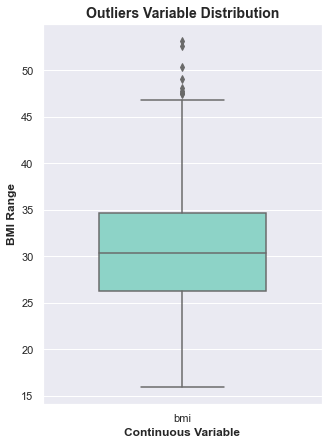

In [15]:
outliers = ['bmi']
plt.rcParams['figure.figsize'] = [5,7]
sns.boxplot(data=df[outliers], orient="v", palette="Set3" ,whis=1.5,saturation=1, width=0.6)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("BMI Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

Text(0.5, 0, 'Continuous Variable')

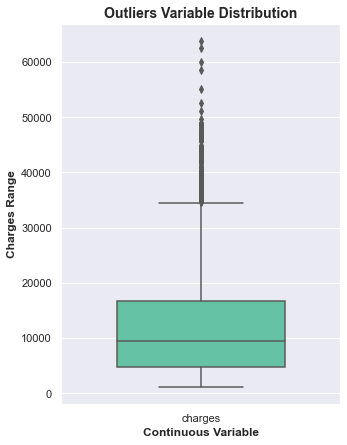

In [13]:
outliers = ['charges']
plt.rcParams['figure.figsize'] = [5,7]
sns.boxplot(data=df[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.6)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Charges Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

Text(0.5, 0, 'Continuous Variable')

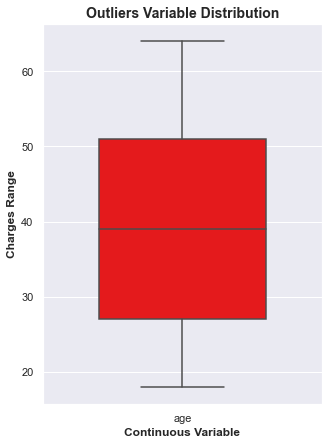

In [19]:
outliers = ['age']
plt.rcParams['figure.figsize'] = [5,7]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.6)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Charges Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

In [20]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

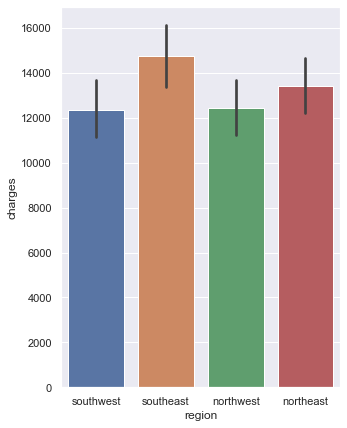

In [27]:
sns.barplot(df.region, df.charges, data=df)

In [27]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0, 0.5, 'Frequency')

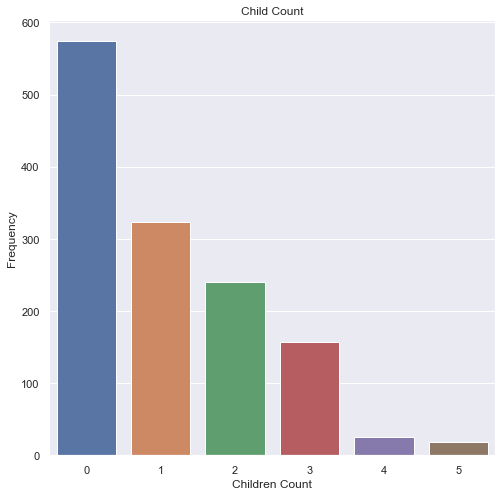

In [8]:
count = sns.countplot('children', data=df) 
count.set_title('Child Count')
count.set_xlabel('Children Count') 
count.set_ylabel('Frequency')

Text(0, 0.5, 'Charges')

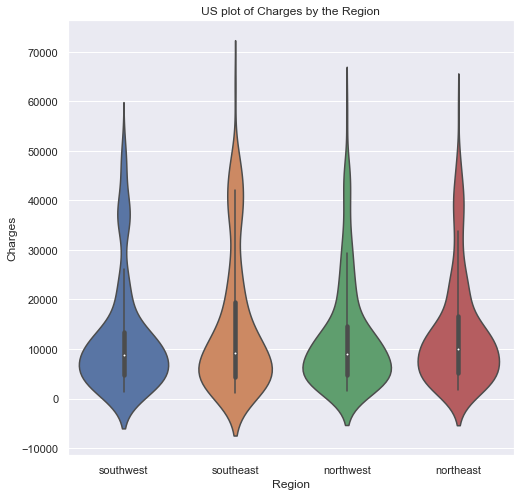

In [68]:
# sns.boxplot(df['region'], df['charges'])
violin = sns.violinplot(x='region', y='charges', data=df) 
violin.set_title('US plot of Charges by the Region')
violin.set_xlabel('Region')
violin.set_ylabel('Charges')

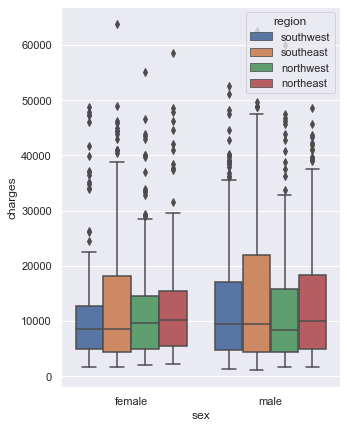

In [24]:
sns.boxplot(x='sex', y='charges', hue='region', data=df)

Text(0.5, 1.0, 'Charges Distribution Plot')

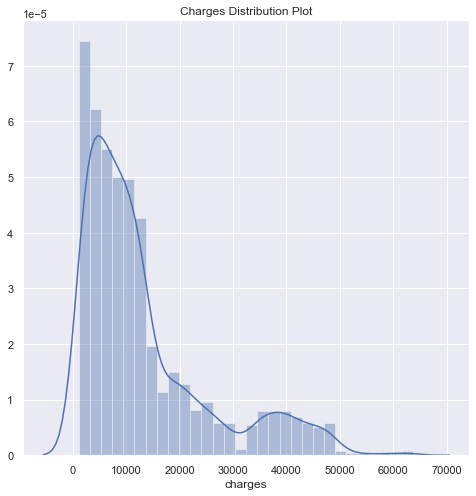

In [44]:
# Distribution of the charges column 
sns.distplot(df['charges'])
plt.title('Charges Distribution Plot')

### Lets the distribution of the bmi column

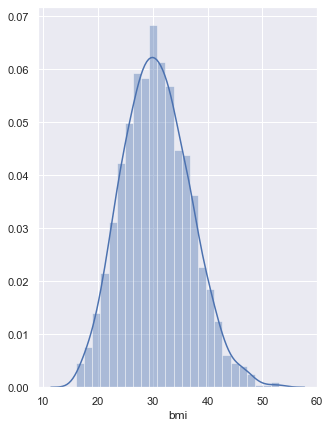

In [26]:
sns.distplot(df['bmi'])

In [31]:
male = df[df['sex'] == 'male']
male.charges.mean()
        

13956.751177721893

In [32]:
female = df[df['sex'] == 'female']
female.charges.mean()

12569.578843835347

In [36]:
fkid = df.groupby(df['sex'])['children']
fkid.value_counts()

sex     children
female  0           289
        1           158
        2           119
        3           77 
        4           11 
        5           8  
male    0           285
        1           166
        2           121
        3           80 
        4           14 
        5           10 
Name: children, dtype: int64

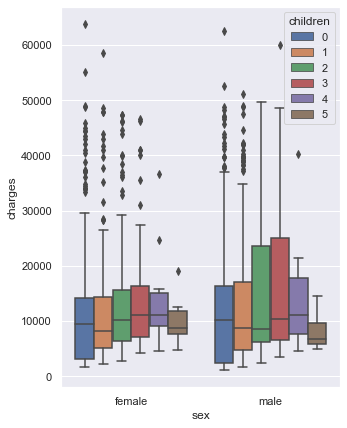

In [75]:
sns.boxplot(x='sex', y='charges', hue='children', data=df)

#### Notice on average, clients who have No children tend to still have a the same or above aveerage medical cost. 

* Why?


In [9]:
# df.loc[:,'no_kids'] = df[df['children']== 0]
# df_obj['ID'] = dict(zip(ids, df_obj['Name']))

In [12]:
del df['Unnamed: 0']

In [14]:
# df.drop(['Unnamed: 0.1.1', 'Unnamed: 0.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1'], axis=1)

,Unnamed: 0.1.1.1.1.1,age,sex,bmi,children,smoker,region,charges,no_kids
0,0,19,female,27.9000,0,yes,southwest,16884.9240,nan
1,1,18,male,33.7700,1,no,southeast,1725.5523,nan
2,2,28,male,33.0000,3,no,southeast,4449.4620,nan
3,3,33,male,22.7050,0,no,northwest,21984.4706,nan
4,4,32,male,28.8800,0,no,northwest,3866.8552,nan
...,...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.9700,3,no,northwest,10600.5483,nan
1334,1334,18,female,31.9200,0,no,northeast,2205.9808,nan
1335,1335,18,female,36.8500,0,no,southeast,1629.8335,nan
1336,1336,21,female,25.8000,0,no,southwest,2007.9450,nan


In [18]:
# Dropping multiple columns
# df = df.drop(['Unnamed: 0.1.1.1.1.1','no_kids','Unnamed: 0.1.1', 'Unnamed: 0.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1' ], axis=1)


In [17]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9000,0,yes,southwest,16884.9240
1,18,male,33.7700,1,no,southeast,1725.5523
2,28,male,33.0000,3,no,southeast,4449.4620
3,33,male,22.7050,0,no,northwest,21984.4706


Checking to see if there's any significant changes in charges as it relates to family size

In [16]:
one_kids = df[df['children']== 1]
print(one_kids.charges.mean())
print(one_kids.count())

12731.171831635802
Unnamed: 0    324
age           324
sex           324
bmi           324
children      324
smoker        324
region        324
charges       324
no_kids       0  
dtype: int64


In [18]:
two_kids = df[df['children']== 2]
two_kids.charges.mean()
print(two_kids.charges.mean())
print(two_kids.count())

15073.563733958332
Unnamed: 0    240
age           240
sex           240
bmi           240
children      240
smoker        240
region        240
charges       240
no_kids       0  
dtype: int64


In [19]:
three_kids = df[df['children']== 3]
three_kids.charges.mean()
print(three_kids.charges.mean())
print(three_kids.count())

15355.318366815283
Unnamed: 0    157
age           157
sex           157
bmi           157
children      157
smoker        157
region        157
charges       157
no_kids       0  
dtype: int64


In [19]:
four_kids = df[df['children']== 4]
four_kids.charges.mean()
print(four_kids.charges.mean())
print(four_kids.count())

13850.6563112
age         25
sex         25
bmi         25
children    25
smoker      25
region      25
charges     25
dtype: int64


In [17]:
five_kids = df[df['children']== 5]
five_kids.charges.mean()
print(five_kids.charges.mean())
print(five_kids.count())

8786.035247222222
Unnamed: 0    18
age           18
sex           18
bmi           18
children      18
smoker        18
region        18
charges       18
no_kids       0 
dtype: int64


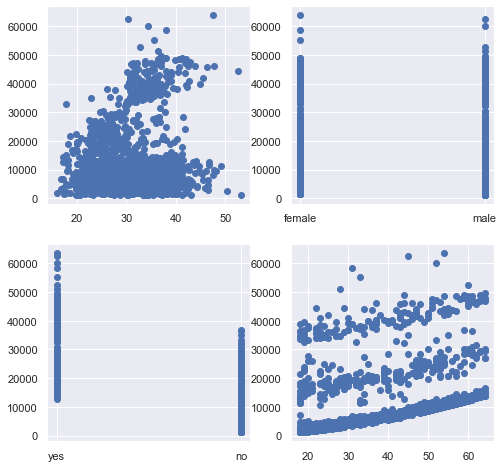

In [20]:
# Scatter Plot of independent variables vs dependent variables

scatter_plot = plt.figure()
axesl = scatter_plot.add_subplot(2, 2, 1) 
axes2 = scatter_plot.add_subplot(2, 2, 2)
axes3 = scatter_plot.add_subplot(2, 2, 3)
axes4 = scatter_plot.add_subplot(2, 2, 4)
axesl.scatter(df['bmi'], df['charges'])
axes2.scatter(df['sex'], df['charges'])
axes3.scatter(df['smoker'], df['charges'])
axes4.scatter(df['age'], df['charges'])
sns.set(style='darkgrid')
scatter_plot.show()

(4.5, -0.5)

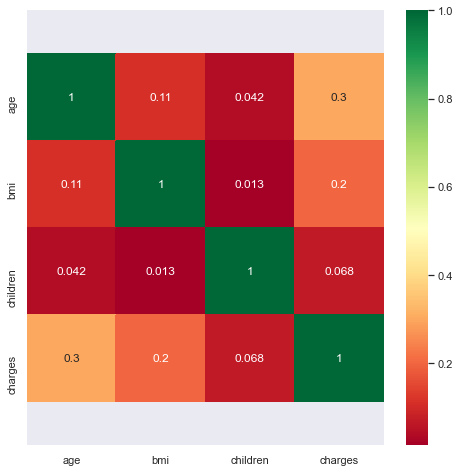

In [ ]:
# linear_model.params # Let's check the r -squared measure of goodness of fit

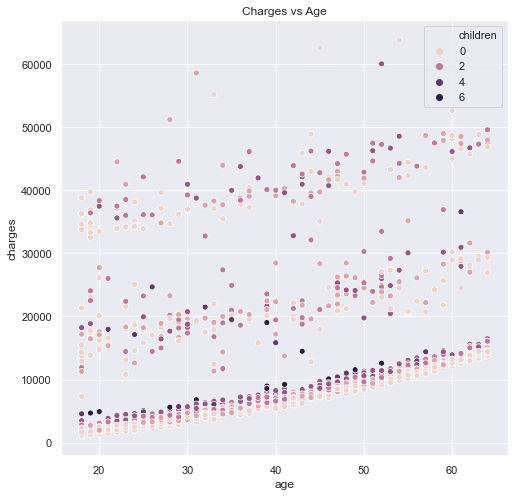

In [48]:

sns.scatterplot(df.age, df.charges, hue='children', data=df)

plt.setp(an.get_xticklabels(), rotation=45)
plt.title("Charges vs Age")
plt.savefig('India_charge_age.png', transparent=True)

##### This graphs has the same trend lines as the India Data set. 

* Check out the 3 bands of that represent charges of clients. That come out in different charge range
* My assumtions is that these are clients with various family sizes. 
* My other assumption is that smokers may have something to do with the bands


In [55]:
# Created a dataframe just for clients who smoke
smoke = df[df['smoker'] == 'yes']

In [56]:
smoke.bmi.mean()


30.70844890510949

In [57]:
# Created a dataframe for all clients who do not smoke
nosmoke = df[df['smoker'] == 'no']

In [58]:
nosmoke.bmi.mean()

30.651795112781954

In [59]:
print(smoke.charges.mean())
print(nosmoke.charges.mean())
# On average Smokers are charged 3 times higher than clients who do not smoke

32050.23183153284
8434.268297856204


Text(0.5, 1.0, 'Charges for Smokers')

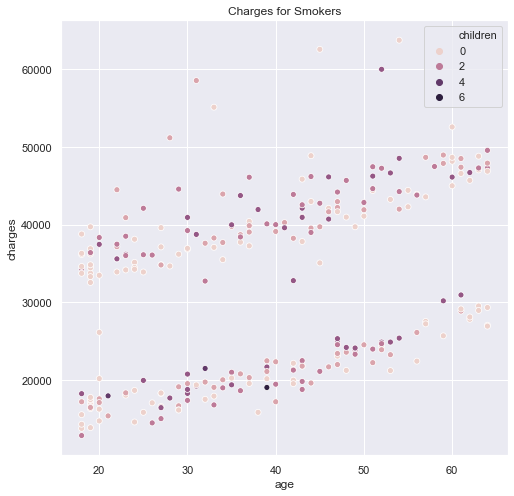

In [39]:
sns.scatterplot(smoke.age, smoke.charges, hue='children', data=smoke)
plt.title('Charges for Smokers')
# sns.scatterplot(nosmoke.age, nosmoke.charges, hue='children', data=nosmoke)

Text(0.5, 1.0, 'Charges for Nonsmokers')

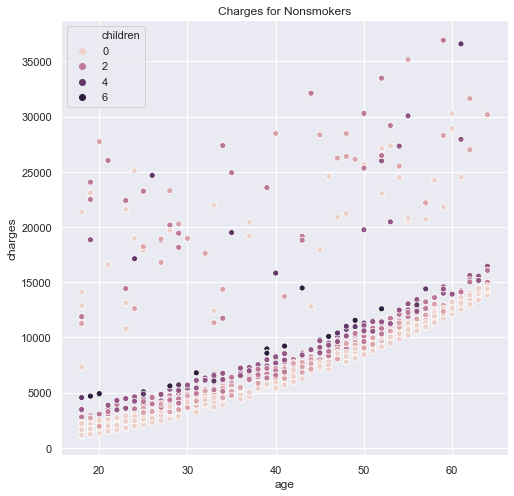

In [40]:
sns.scatterplot(nosmoke.age, nosmoke.charges, hue='children', data=nosmoke)
plt.title('Charges for Nonsmokers')

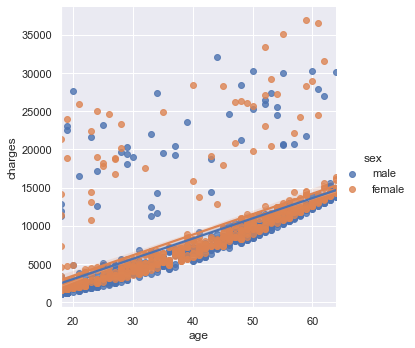

In [53]:
sns.lmplot(x='age', y='charges', hue='sex', data=nosmoke)

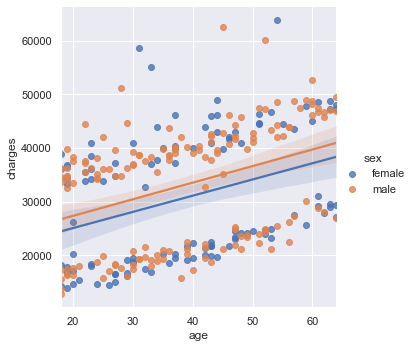

In [61]:
sns.lmplot(x='age', y='charges', hue='sex', data=smoke)

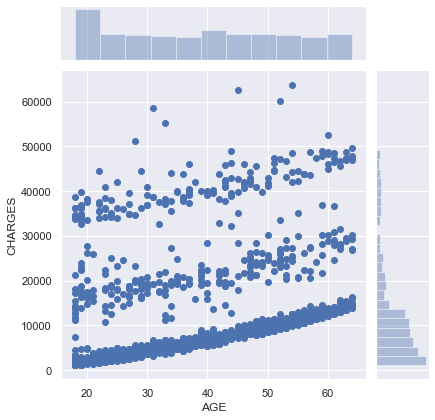

In [30]:
hex = sns.jointplot(x="age", y="charges", data=df)
hex.set_axis_labels(xlabel='AGE', ylabel='CHARGES')


#### Distinct Correlations

* There is strong correlation for clients that smoke compared to those that do
* There also moderate correlation in charges when compared to age

## Statistical Analysis/Prediction 

* Let try to prediction model to see how our categories affect charges
* Smoking shows there is a stark contrast that impact how Insurance charge clients

In [84]:
# Adding a constant variable and Build a first fitted model
formula = 'charges ~ age + smoke_code + bmi'

In [85]:
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:11:59   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
age          259.5475     11.934     21.748      0.000     236.136     282.959
smoke_code  2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
bmi          322.6151     27.487     11.737      0.000     268.692     376.538
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
train, test = statsmodels_train_test_split(df)

In [87]:
y_test_pred = model.predict(test)

In [88]:
r2_score(test['charges'], y_test_pred)

0.739876769798787

In [89]:
mean_squared_error(test['charges'], y_test_pred)

41482141.5656841

In [ ]:
# We need to use a package from sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit_transform(df['smoker'])
le

(5.5, -0.5)

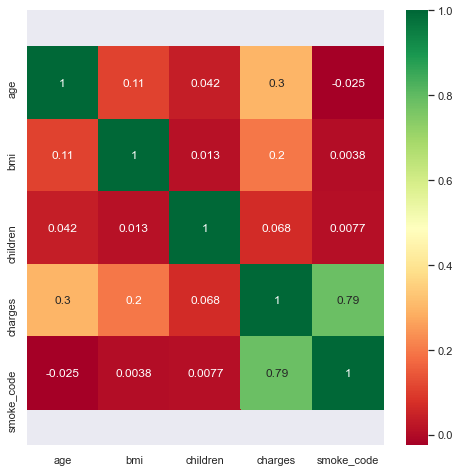

In [90]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (8, 8))
df_corr = df.corr()
ax = sns.heatmap(df_corr, annot=True, cmap="RdYlGn") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit_transform(df['smoker'])
le

array([1, 0, 0, ..., 0, 0, 1])

In [75]:
df.loc[:,'smoke_code'] = le
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_code,smoke_code
0,19,female,27.9000,0,yes,southwest,16884.9240,1,1
1,18,male,33.7700,1,no,southeast,1725.5523,0,0
2,28,male,33.0000,3,no,southeast,4449.4620,0,0
3,33,male,22.7050,0,no,northwest,21984.4706,0,0
4,32,male,28.8800,0,no,northwest,3866.8552,0,0


In [77]:
df = df.drop(['sex_code'], axis=1)

In [78]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges,smoke_code
0,19,female,27.9000,0,yes,southwest,16884.9240,1
1,18,male,33.7700,1,no,southeast,1725.5523,0
2,28,male,33.0000,3,no,southeast,4449.4620,0
3,33,male,22.7050,0,no,northwest,21984.4706,0


In [ ]:
## THIS IS MODEL PREDICTION ON NEW DATA THE MODEL HAS NEVER SEEN!! NOTICE WE ARE USING THE TEST SET
y_test_pred = linear_model.predict(X_test)

